<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [3]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-3-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)

The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

In [6]:
boston_df.isnull().sum()

Unnamed: 0    0
CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
LSTAT         0
MEDV          0
dtype: int64

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [7]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


#### Task 2: Generate basic statistics and visualizations for upper management

For all visualizations, please include a title in each graph and appropriate labels. Generate the following and explain your findings:
- For the "Median value of owner-occupied homes" provide a boxplot
- Provide a  bar plot for the Charles river variable
- Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
- Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
- Create a histogram for the pupil to teacher ratio variable
 

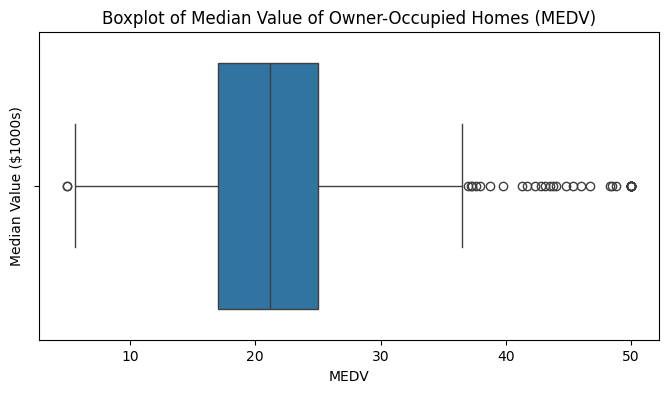

In [78]:
pyplot.figure(figsize=(8,4))
sns.boxplot(x=boston_df['MEDV'])
pyplot.title("Boxplot of Median Value of Owner-Occupied Homes (MEDV)")
pyplot.ylabel("Median Value ($1000s)")
pyplot.show()

- This boxplot shows the distribution of median home values (MEDV) in $1000s
- The presence of outliers is indicated by points outside the whiskers

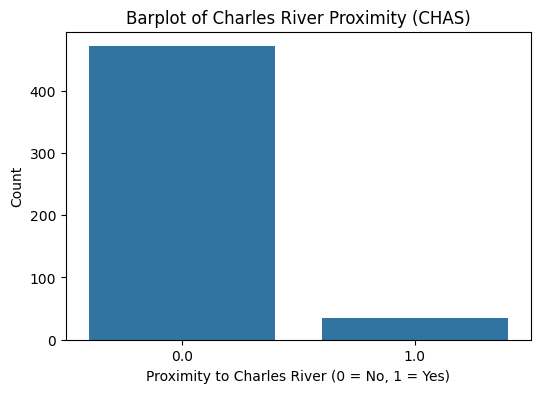

In [80]:
pyplot.figure(figsize=(6,4))
sns.countplot(x=boston_df['CHAS'])
pyplot.title("Barplot of Charles River Proximity (CHAS)")
pyplot.xlabel("Proximity to Charles River (0 = No, 1 = Yes)")
pyplot.ylabel("Count")
pyplot.show()

- This barplot shows the quantiy of properties that are located near the Charles River (CHAS = 1) versus those that are not (CHAS = 0)

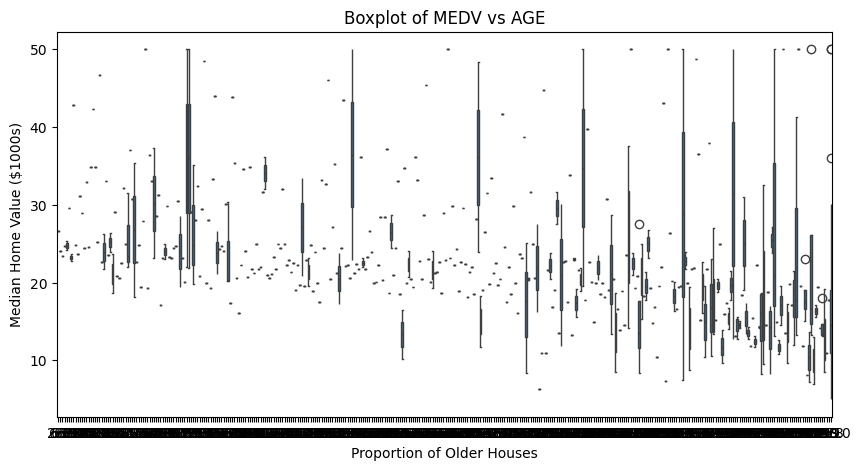

In [81]:
pyplot.figure(figsize=(10,5))
sns.boxplot(x=boston_df['AGE'], y=boston_df['MEDV'])
pyplot.title("Boxplot of MEDV vs AGE")
pyplot.xlabel("Proportion of Older Houses")
pyplot.ylabel("Median Home Value ($1000s)")
pyplot.show()

- This boxplot represents the distribution of home values (MEDV) based on the proportion of older houses (AGE)

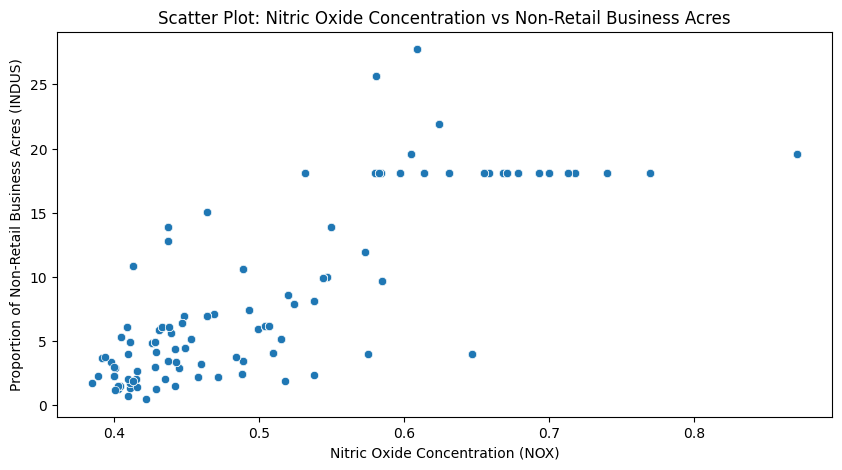

In [82]:
pyplot.figure(figsize=(10,5))
sns.scatterplot(x=boston_df['NOX'], y=boston_df['INDUS'])
pyplot.title("Scatter Plot: Nitric Oxide Concentration vs Non-Retail Business Acres")
pyplot.xlabel("Nitric Oxide Concentration (NOX)")
pyplot.ylabel("Proportion of Non-Retail Business Acres (INDUS)")
pyplot.show()

- This scatter plot shows the relationship between nitric oxides concentration (NOX) and INDUS
- We can see that there is a positive correlation

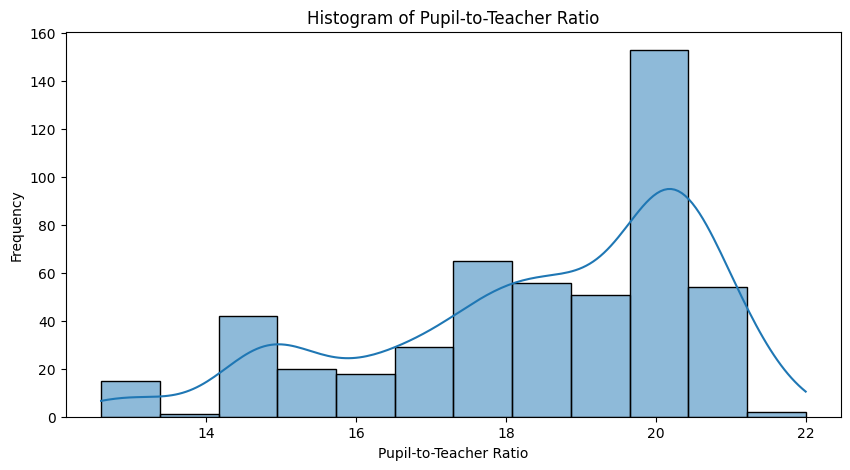

In [9]:
pyplot.figure(figsize=(10,5))
sns.histplot(boston_df['PTRATIO'], bins=12, kde=True)
pyplot.title("Histogram of Pupil-to-Teacher Ratio")
pyplot.xlabel("Pupil-to-Teacher Ratio")
pyplot.ylabel("Frequency")
pyplot.show()

- This histogram displays the distribution of pupil-to-teacher ratios in different areas

#### Task 3: Use the appropriate tests to answer the questions provided
- Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
- Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
- Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
- What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Using the appropriate graphs and charts, generate basic statistics and visualizations that you think will be useful for the upper management to give them important insight given the question they are asking, in your graphs, include an explanation of each statistic

- State your hypothesis
- Use α = 0.05
- Perform the test Statistics.
- State the conclusion from the test.

#
#### Testing if homes near the Charles River have a different median value (t-test)
- H₀: There is no significant difference in median value (MEDV) between homes near the Charles River and those that are not
- H₁: Homes near the Charles River have a significantly different median value

In [84]:
scipy.stats.levene(
    boston_df[boston_df['CHAS'] == 0]['MEDV'],
    boston_df[boston_df['CHAS'] == 1]['MEDV'],
    center='median'
)

LeveneResult(statistic=4.590342218715871, pvalue=0.03263097600633006)

In [85]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
    boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var=False)

TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

#### Conclusion: Here, we can reject the null hypothesis given that thea p-value is less than 0.05. There is a significant difference in the median value of houses located near the Charles River over not near the river

#
#### Question: Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?
- H₀: There is no significant difference in the mean value of homes
- H₁: This is a significant difference in all values of houses

In [91]:
boston_df.loc[boston_df["AGE"]<=35,'AgeGroup']='35 years and below'
boston_df.loc[(boston_df["AGE"]>35) & (boston_df["AGE"]<70),'AgeGroup']='Between 35 and 70 years'
boston_df.loc[boston_df["AGE"]>70,'AgeGroup']='Above 70 years'

thirtyfive=boston_df[boston_df['AgeGroup']=='35 years and below']['MEDV']
between=boston_df[boston_df['AgeGroup']=='Between 35 and 70 years']['MEDV']
seventy=boston_df[boston_df['AgeGroup']=='Above 70 years']['MEDV']

In [93]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive,between,seventy)
print("F=Statistic:",f_statistic,"P-value:",p_value)

F=Statistic: 36.40764999196599 P-value: 1.7105011022702984e-15


#### Conclusion: We can reject the null hypothesis that there is no difference in Age Group of Homes Built Prior to 1940 becuase the p-value is less than 0.05 

#
#### Testing if NOX concentration affects non-retail business acres (Regression Analysis)
- H₀: There is no significant relationship between NOX and INDUS
- H₁: Higher NOX levels are associated with higher INDUS values

In [94]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

#### Conclusion: Here, we can reject the null hypothesis given that thea p-value is less than 0.05. There is a significant difference on means of non-retail acres due to NOW concentrations

#
#### Question: Testing the impact of weighted distance on employment centers on home values (Regression Analysis)
- H₀: There is no relationship between DIS (weighted distance to employment centers) and MEDV
- H₁: Increased distance to employment centers significantly impacts home values

In [16]:
X=boston_df['DIS']
X=sm.add_constant(X)
Y=boston_df['MEDV']
lm=sm.OLS(Y,X).fit()
lm.predict()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 01 May 2025   Prob (F-statistic):           1.21e-08
Time:                        00:32:33   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
boston_df['MEDV'].mean()

22.532806324110677

#### Conclusion: The F distribution (P value) is less than 0.05 and we can reject the null hypothesis. There is a significant difference in how distance impacts the weighted difference of employment centers on home values